## Practice: Basic Artificial Neural Networks
Credits: this notebook belongs to [Practical DL](https://docs.google.com/forms/d/e/1FAIpQLScvrVtuwrHSlxWqHnLt1V-_7h2eON_mlRR6MUb3xEe5x9LuoA/viewform?usp=sf_link) course by Yandex School of Data Analysis.

We will start working with neural networks on the practice session. Your homework will be to finish the implementation of the layers.

Our goal is simple, yet an actual implementation may take some time :). We are going to write an Artificial Neural Network (almost) from scratch. The software design was heavily inspired by [PyTorch](http://pytorch.org) which is the main framework of our course 

Speaking about the homework (once again, it will be really similar to this seminar), it requires sending **multiple** files, please do not forget to include all the files when sending to TA. The list of files:
- This notebook
- modules.ipynb with all blocks implemented (except maybe `Conv2d` and `MaxPool2d` layers implementation which are part of 'advanced' version of this homework)

In [0]:
%matplotlib inline
from time import time, sleep
import numpy as np
import matplotlib.pyplot as plt
from IPython import display

# Framework

Implement everything in `modules.ipynb`. Read all the comments thoughtfully to ease the pain. Please try not to change the prototypes.

Do not forget, that each module should return **AND** store `output` and `gradInput`.

The typical assumption is that `module.backward` is always executed after `module.forward`,
so `output` is stored, this would be useful for `SoftMax`. 

### Tech note
Prefer using `np.multiply`, `np.add`, `np.divide`, `np.subtract` instead of `*`,`+`,`/`,`-` for better memory handling.

Example: suppose you allocated a variable 

```
a = np.zeros(...)
```
So, instead of
```
a = b + c  # will be reallocated, GC needed to free
``` 
You can use: 
```
np.add(b,c,out = a) # puts result in `a`
```

In [0]:
# (re-)load layers
%run modules.ipynb

# Toy example

Use this example to debug your code, start with logistic regression and then test other layers. You do not need to change anything here. This code is provided for you to test the layers. Also it is easy to use this code in MNIST task.

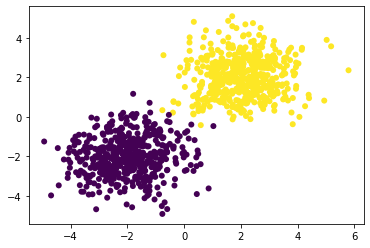

In [3]:
# Generate some data
N = 500

X1 = np.random.randn(N,2) + np.array([2,2])
X2 = np.random.randn(N,2) + np.array([-2,-2])

Y = np.concatenate([np.ones(N),np.zeros(N)])[:,None]
Y = np.hstack([Y, 1-Y])

X = np.vstack([X1,X2])
plt.scatter(X[:,0],X[:,1], c = Y[:,0], edgecolors= 'none')

Define a **logistic regression** for debugging. 

In [4]:
net = Sequential()
net.add(Linear(2, 2))
net.add(LogSoftMax())

criterion = ClassNLLCriterion()

print(net)

# Test something like that then 

# net = Sequential()
# net.add(Linear(2, 4))
# net.add(ReLU())
# net.add(Linear(4, 2))
# net.add(LogSoftMax())

Linear 2 -> 2
LogSoftMax



Start with batch_size = 1000 to make sure every step lowers the loss, then try stochastic version.

In [0]:
# Iptimizer params
optimizer_config = {'learning_rate' : 1e-1, 'momentum': 0.9}
optimizer_state = {}

# Looping params
n_epoch = 20
batch_size = 128

In [0]:
# batch generator
def get_batches(dataset, batch_size):
    X, Y = dataset
    n_samples = X.shape[0]
        
    # Shuffle at the start of epoch
    indices = np.arange(n_samples)
    np.random.shuffle(indices)
    
    for start in range(0, n_samples, batch_size):
        end = min(start + batch_size, n_samples)
        
        batch_idx = indices[start:end]
    
        yield X[batch_idx], Y[batch_idx]

### Train

Basic training loop. Examine it.

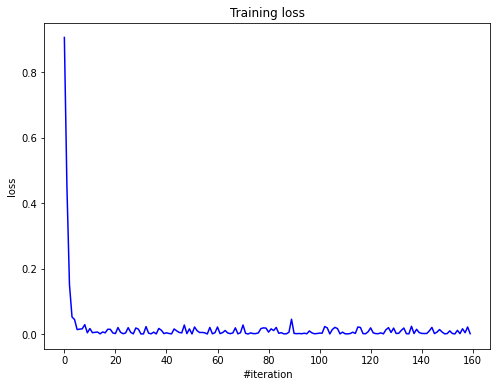

Current loss: 0.000916


In [7]:
loss_history = []

for i in range(n_epoch):
    for x_batch, y_batch in get_batches((X, Y), batch_size):
        
        net.zeroGradParameters()
        
        # Forward
        predictions = net.forward(x_batch)
        loss = criterion.forward(predictions, y_batch)
    
        # Backward
        dp = criterion.backward(predictions, y_batch)
        net.backward(x_batch, dp)
        
        # Update weights
        sgd_momentum(net.getParameters(), 
                     net.getGradParameters(), 
                     optimizer_config,
                     optimizer_state)      
        
        loss_history.append(loss)

    # Visualize
    display.clear_output(wait=True)
    plt.figure(figsize=(8, 6))
        
    plt.title("Training loss")
    plt.xlabel("#iteration")
    plt.ylabel("loss")
    plt.plot(loss_history, 'b')
    plt.show()
    
    print('Current loss: %f' % loss)    

# Digit classification 

We are using old good [MNIST](http://yann.lecun.com/exdb/mnist/) as our dataset.

In [0]:
import mnist_dataset
X_train, y_train, X_val, y_val, X_test, y_test = mnist_dataset.load_dataset()

One-hot encode the labels first.

In [0]:
import tqdm
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [0]:
# one_hot_encoder = OneHotEncoder().fit(y_train.reshape((-1, 1)))
from sklearn.multiclass import LabelBinarizer
lb = LabelBinarizer()

lb_train = lb.fit(y_train)#.reshape(-1, 1))
y_train = lb_train.transform(y_train)

lb = LabelBinarizer()
lb_test = lb.fit(y_test)
y_test = lb_test.transform(y_test)

lb = LabelBinarizer()
lb_val = lb.fit(y_val)#((-1, 1)))
y_val = lb_val.transform(y_val)#((-1, 1)))

- **Compare** `ReLU`, `ELU`, `LeakyReLU`, `SoftPlus` activation functions. 
You would better pick the best optimizer params for each of them, but it is overkill for now. Use an architecture of your choice for the comparison.
- **Try** inserting `BatchNormalization` (folowed by `ChannelwiseScaling`) between `Linear` module and activation functions.
- Plot the losses both from activation functions comparison and `BatchNormalization` comparison on one plot. Please find a scale (log?) when the lines are distinguishable, do not forget about naming the axes, the plot should be goodlooking.
- Plot the losses for two networks: one trained by momentum_sgd, another one trained by Adam. Which one performs better?
- Hint: good logloss for MNIST should be around 0.5. 

In [0]:

# Iptimizer params
optimizer_config = {'learning_rate' : 1e-2, 'momentum': 0.9}
optimizer_state = {}

criterion = ClassNLLCriterion()

# Looping params
n_epoch = 20
batch_size = 1024

Сравним разные функции активации

<class '__main__.ReLU'>
Epoch 0 started...
Epoch 0 mean loss: 1.955
Validation 0 epoch accuracy: 0.750
Epoch 1 started...
Epoch 1 mean loss: 1.978
Validation 1 epoch accuracy: 0.783
Epoch 2 started...
Epoch 2 mean loss: 1.929
Validation 2 epoch accuracy: 0.764
Epoch 3 started...
Epoch 3 mean loss: 1.939
Validation 3 epoch accuracy: 0.758
Epoch 4 started...
Epoch 4 mean loss: 1.903
Validation 4 epoch accuracy: 0.778
Epoch 5 started...
Epoch 5 mean loss: 1.916
Validation 5 epoch accuracy: 0.767
Epoch 6 started...
Epoch 6 mean loss: 1.948
Validation 6 epoch accuracy: 0.781
Epoch 7 started...
Epoch 7 mean loss: 1.931
Validation 7 epoch accuracy: 0.781
Epoch 8 started...
Epoch 8 mean loss: 1.875
Validation 8 epoch accuracy: 0.747
Epoch 9 started...
Epoch 9 mean loss: 1.939
Validation 9 epoch accuracy: 0.759
Epoch 10 started...
Epoch 10 mean loss: 1.905
Validation 10 epoch accuracy: 0.786
Epoch 11 started...
Epoch 11 mean loss: 1.904
Validation 11 epoch accuracy: 0.798
Epoch 12 started...
Ep

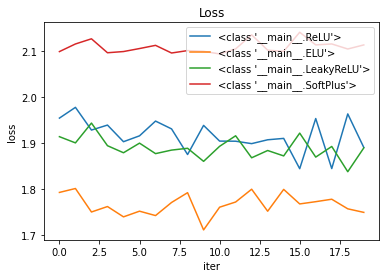

In [13]:
losses = []

for activation in [ReLU, ELU, LeakyReLU, SoftPlus]:
    loss_log = []
    acc_log = []
    print(activation)

    for i in range(20):
        print("Epoch {} started...".format(i))
        
        net = Sequential()

        net.add(Flatten())
        net.add(Linear(28 * 28, 50))
        # net.add(BatchNormalization())
        net.add(activation())
        # net.add(Dropout())
        net.add(Linear(50, 10))
        net.add(LogSoftMax())

        net.train()
        epoch_losses = []
        for x_batch, y_batch in (get_batches((X_train, y_train), batch_size)):
      
            net.zeroGradParameters()
            
            # Forward
            predictions = net.forward(x_batch)
            loss = criterion.forward(predictions, y_batch)
        
            # Backward
            dp = criterion.backward(predictions, y_batch)
            net.backward(x_batch, dp)
            
            # Update weights
            sgd_momentum(net.getParameters(), 
                        net.getGradParameters(), 
                        optimizer_config,
                        optimizer_state)      
            
            epoch_losses.append(loss)
        
        avg_loss = np.mean(epoch_losses)
        loss_log.append(avg_loss)
        print("Epoch {} mean loss: {:.3f}".format(i, avg_loss))
        
        net.evaluate()
        y_true = []
        y_pred = []
        for x_batch, y_batch in (get_batches((X_val, y_val), batch_size)):
            # print(len(x_batch), len(y_batch))

            predictions = net.forward(x_batch)
            # print(len(list(np.where(predictions == predictions.max(axis=1, keepdims=True), 1, 0))))
            y_pred += list(np.where(predictions == predictions.max(axis=1, keepdims=True), 1, 0))
            # print(len(list(y_batch)))
            y_true += list(y_batch)
            
        # print(y_true)
        # print(y_pred)
        acc_log.append(accuracy_score(y_true, y_pred))
        print("Validation {} epoch accuracy: {:.3f}".format(i, accuracy_score(y_true, y_pred)))
  
    # plt.title('Accuracy')
    # plt.ylabel('acc')
    # plt.xlabel('iter')
    # plt.plot(acc_log, label=str(activation))
    # plt.legend()

    plt.title('Loss')
    plt.ylabel('loss')
    plt.xlabel('iter')
    plt.plot(loss_log, label=str(activation))
    plt.legend()

Сравним адам и сгд

Epoch 0 started...
Epoch 0 mean loss: 2.020
Validation 0 epoch accuracy: 0.732
Epoch 1 started...
Epoch 1 mean loss: 1.884
Validation 1 epoch accuracy: 0.775
Epoch 2 started...
Epoch 2 mean loss: 1.967
Validation 2 epoch accuracy: 0.731
Epoch 3 started...
Epoch 3 mean loss: 1.958
Validation 3 epoch accuracy: 0.721
Epoch 4 started...
Epoch 4 mean loss: 1.872
Validation 4 epoch accuracy: 0.787
Epoch 5 started...
Epoch 5 mean loss: 1.887
Validation 5 epoch accuracy: 0.778
Epoch 6 started...
Epoch 6 mean loss: 1.907
Validation 6 epoch accuracy: 0.804
Epoch 7 started...
Epoch 7 mean loss: 1.923
Validation 7 epoch accuracy: 0.768
Epoch 8 started...
Epoch 8 mean loss: 1.886
Validation 8 epoch accuracy: 0.787
Epoch 9 started...
Epoch 9 mean loss: 1.918
Validation 9 epoch accuracy: 0.774
Epoch 10 started...
Epoch 10 mean loss: 1.898
Validation 10 epoch accuracy: 0.781
Epoch 11 started...
Epoch 11 mean loss: 1.894
Validation 11 epoch accuracy: 0.769
Epoch 12 started...
Epoch 12 mean loss: 1.938


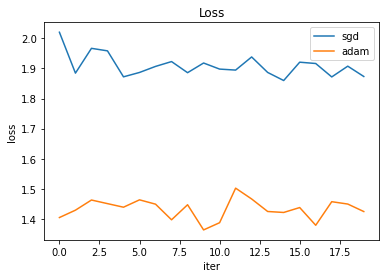

In [14]:
import torch
# adam = torch.optim.Adam(net.getParameters(), lr=1e-4)

for opt in ['sgd', 'adam']:
    loss_log = []
    acc_log = []

    optimizer_state = {}
    for i in range(20):
            print("Epoch {} started...".format(i))
            
            net = Sequential()

            net.add(Flatten())
            net.add(Linear(28 * 28, 50))
            # net.add(BatchNormalization())
            net.add(ReLU())
            # net.add(Dropout())
            net.add(Linear(50, 10))
            net.add(LogSoftMax())

            net.train()
            epoch_losses = []
            for x_batch, y_batch in (get_batches((X_train, y_train), batch_size)):
          
                net.zeroGradParameters()
                
                # Forward
                predictions = net.forward(x_batch)
                loss = criterion.forward(predictions, y_batch)
            
                # Backward
                dp = criterion.backward(predictions, y_batch)
                net.backward(x_batch, dp)
                
                # Update weights
                if opt is 'sgd':
                    sgd_momentum(net.getParameters(), 
                                net.getGradParameters(), 
                                optimizer_config,
                                optimizer_state)   
                else:
                    adam_optimizer(net.getParameters(), 
                                net.getGradParameters(), 
                                {'learning_rate': 0.001, 'beta1': 0.9, 'beta2': 0.999, 'epsilon': 1e-08},
                                optimizer_state) 
                
                epoch_losses.append(loss)
            
            avg_loss = np.mean(epoch_losses)
            loss_log.append(avg_loss)
            print("Epoch {} mean loss: {:.3f}".format(i, avg_loss))
            
            net.evaluate()
            y_true = []
            y_pred = []
            for x_batch, y_batch in (get_batches((X_val, y_val), batch_size)):
                # print(len(x_batch), len(y_batch))

                predictions = net.forward(x_batch)
                # print(len(list(np.where(predictions == predictions.max(axis=1, keepdims=True), 1, 0))))
                y_pred += list(np.where(predictions == predictions.max(axis=1, keepdims=True), 1, 0))
                # print(len(list(y_batch)))
                y_true += list(y_batch)
                
            # print(y_true)
            # print(y_pred)
            acc_log.append(accuracy_score(y_true, y_pred))
            print("Validation {} epoch accuracy: {:.3f}".format(i, accuracy_score(y_true, y_pred)))

    # print(acc_log)
    # plt.title('Accuracy')
    # plt.ylabel('acc')
    # plt.xlabel('iter')
    # plt.plot(acc_log, label=opt)
    # plt.legend()
    # plt.show()

    # print(loss_log)
    plt.title('Loss')
    plt.ylabel('loss')
    plt.xlabel('iter')
    plt.plot(loss_log, label=opt)
    plt.legend()
    # plt.show()

Посмотрим на нормализацию и дропауты

Epoch 0 started...
Epoch 0 mean loss: 1.465
Validation 0 epoch accuracy: 0.873
Epoch 1 started...
Epoch 1 mean loss: 1.474
Validation 1 epoch accuracy: 0.867
Epoch 2 started...
Epoch 2 mean loss: 1.489
Validation 2 epoch accuracy: 0.865
Epoch 3 started...
Epoch 3 mean loss: 1.491
Validation 3 epoch accuracy: 0.869
Epoch 4 started...
Epoch 4 mean loss: 1.484
Validation 4 epoch accuracy: 0.862
Epoch 5 started...
Epoch 5 mean loss: 1.446
Validation 5 epoch accuracy: 0.868
Epoch 6 started...
Epoch 6 mean loss: 1.484
Validation 6 epoch accuracy: 0.863
Epoch 7 started...
Epoch 7 mean loss: 1.480
Validation 7 epoch accuracy: 0.868
Epoch 8 started...
Epoch 8 mean loss: 1.467
Validation 8 epoch accuracy: 0.869
Epoch 9 started...
Epoch 9 mean loss: 1.478
Validation 9 epoch accuracy: 0.868
Epoch 10 started...
Epoch 10 mean loss: 1.472
Validation 10 epoch accuracy: 0.867
Epoch 11 started...
Epoch 11 mean loss: 1.476
Validation 11 epoch accuracy: 0.868
Epoch 12 started...
Epoch 12 mean loss: 1.474


No handles with labels found to put in legend.


Epoch 19 mean loss: 1.456
Validation 19 epoch accuracy: 0.877


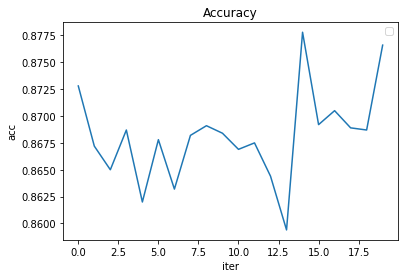

No handles with labels found to put in legend.


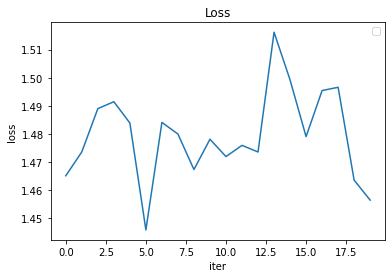

In [15]:
loss_log = []
acc_log = []

for i in range(n_epoch):
    print("Epoch {} started...".format(i))
    
    net = Sequential()

    net.add(Flatten())
    net.add(Linear(28 * 28, 50))
    net.add(BatchNormalization())
    net.add(activation())
    net.add(Dropout())
    net.add(Linear(50, 10))
    net.add(LogSoftMax())

    net.train()
    epoch_losses = []
    for x_batch, y_batch in (get_batches((X_train, y_train), batch_size)):
  
        net.zeroGradParameters()
        
        # Forward
        predictions = net.forward(x_batch)
        loss = criterion.forward(predictions, y_batch)
    
        # Backward
        dp = criterion.backward(predictions, y_batch)
        net.backward(x_batch, dp)
        
        # Update weights
        sgd_momentum(net.getParameters(), 
                    net.getGradParameters(), 
                    optimizer_config,
                    optimizer_state)      
        
        epoch_losses.append(loss)
    
    avg_loss = np.mean(epoch_losses)
    loss_log.append(avg_loss)
    print("Epoch {} mean loss: {:.3f}".format(i, avg_loss))
    
    net.evaluate()
    y_true = []
    y_pred = []
    for x_batch, y_batch in (get_batches((X_val, y_val), batch_size)):
        # print(len(x_batch), len(y_batch))

        predictions = net.forward(x_batch)
        # print(len(list(np.where(predictions == predictions.max(axis=1, keepdims=True), 1, 0))))
        y_pred += list(np.where(predictions == predictions.max(axis=1, keepdims=True), 1, 0))
        # print(len(list(y_batch)))
        y_true += list(y_batch)
        
    # print(y_true)
    # print(y_pred)
    acc_log.append(accuracy_score(y_true, y_pred))
    print("Validation {} epoch accuracy: {:.3f}".format(i, accuracy_score(y_true, y_pred)))

plt.title('Accuracy')
plt.ylabel('acc')
plt.xlabel('iter')
plt.plot(acc_log)
plt.legend()
plt.show()

plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('iter')
plt.plot(loss_log)
plt.legend()
plt.show()

Write your personal opinion on the activation functions, think about computation times too. Does `BatchNormalization` help?

**ELU  showed the best results, so this basic layer for non-linearity confirmed its usefulness. BatchNormalization and Dropout layers don't help a lot, the result is almost the same (accuracy was increased in ~1%). But the time of training was increased. Adam optimizer is better than sgd in ~0.6 of loss.**

**Finally**, use all your knowledge to build a super cool model on this dataset. Use **dropout** to prevent overfitting, play with **learning rate decay**. You can use **data augmentation** such as rotations, translations to boost your score. Use your knowledge and imagination to train a model. Don't forget to call `training()` and `evaluate()` methods to set desired behaviour of `BatchNormalization` and `Dropout` layers.

In [16]:
    y_true = []
    y_pred = []
    for x_batch, y_batch in (get_batches((X_test, y_test), batch_size)):
        # print(len(x_batch), len(y_batch))

        predictions = net.forward(x_batch)
        # print(len(list(np.where(predictions == predictions.max(axis=1, keepdims=True), 1, 0))))
        y_pred += list(np.where(predictions == predictions.max(axis=1, keepdims=True), 1, 0))
        # print(len(list(y_batch)))
        y_true += list(y_batch)
        
    # print(y_true)
    # print(y_pred)
    print("Test {} accuracy: {:.3f}".format(i, accuracy_score(y_true, y_pred)))

Test 19 accuracy: 0.866


Print here your accuracy on test set. It should be around 90%.

In [17]:
# print(len(y_true))
# print(len(y_pred))

print("Test accuracy: {:.3f}".format(accuracy_score(y_true, y_pred)))

Test accuracy: 0.866


### Comparing with PyTorch implementation
The last (and maybe the easiest step after compared to the previous tasks: build a network with the same architecture as above now with PyTorch.

You can refer to the `week0_09` or `Lab3_part2` notebooks for hints.

__Good Luck!__

In [0]:
from torch import nn

class NeuralNetwork(nn.Module):
    def __init__(self, input_shape=28*28, num_classes=10, input_channels=50):
        super(self.__class__, self).__init__()
        self.model = nn.Sequential(
            nn.Flatten(), # This layer converts image into a vector to use Linear layers afterwards
            # nn.Conv2d(in_channels=1, out_channels=input_shape, kernel_size=3),
            nn.Linear(input_shape, input_shape),
            nn.BatchNorm1d(input_shape),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(input_shape, num_classes),
            nn.LogSoftmax()
        )
        
    def forward(self, inp):       
        return self.model(inp)
        # out = nn.Flatten(inp)
        # print(out)

net = NeuralNetwork()

In [0]:
loss_history = []
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
net = NeuralNetwork().to(device)
optimizer = torch.optim.Adam(net.parameters(), lr=1e-4)
criterion = nn.CrossEntropyLoss()
 

In [0]:
import time

def train_model(model, dataloaders, criterion, optimizer, num_epochs=25, is_inception=False):
    since = time.time()

    val_acc_history = []
    train_acc_history = []
    val_loss_history = []
    train_loss_history = []

    # best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    # Get model outputs and calculate loss
                    # Special case for inception because in training it has an auxiliary output. In train
                    #   mode we calculate the loss by summing the final output and the auxiliary output
                    #   but in testing we only consider the final output.
                    if is_inception and phase == 'train':
                        # From https://discuss.pytorch.org/t/how-to-optimize-inception-model-with-auxiliary-classifiers/7958
                        outputs, aux_outputs = model.forward(inputs)
                        loss1 = criterion(outputs, labels)
                        loss2 = criterion(aux_outputs, labels)
                        loss = loss1 + 0.4*loss2
                    else:
                        outputs = model.forward(inputs)
                        loss = criterion(outputs, labels)

                    _, preds = torch.max(outputs, 1)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(dataloaders[phase].dataset)
            epoch_acc = running_corrects.double() / len(dataloaders[phase].dataset)

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'train' and epoch_acc > best_acc:
                best_acc = epoch_acc
                # best_model_wts = copy.deepcopy(model.state_dict())
                train_acc_history.append(epoch_acc)
                train_loss_history.append(epoch_loss)
            if phase == 'val':
                val_acc_history.append(epoch_acc)
                val_loss_history.append(epoch_loss)

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # print(train_loss_history)
    # print(val_loss_history)

    plt.title('Loss')
    plt.xlabel('Iteration')
    plt.ylabel('loss')
    plt.plot(train_loss_history)
    plt.plot(val_loss_history)
    plt.legend(['Train', "Val"])
    plt.show()

    plt.title('Accuracy')
    plt.xlabel('Iteration')
    plt.ylabel('acc')
    plt.plot(train_acc_history)
    plt.plot(val_acc_history)
    plt.legend(['Train', "Val"])
    plt.show()

    # load best model weights
    # model.load_state_dict(best_model_wts)
    return model, train_acc_history, val_acc_history, train_loss_history, val_loss_history

Epoch 0/24
----------


/usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:100: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


train Loss: 1.1222 Acc: 0.6847
val Loss: 0.5287 Acc: 0.8863

Epoch 1/24
----------
train Loss: 0.4830 Acc: 0.8827
val Loss: 0.3583 Acc: 0.9148

Epoch 2/24
----------
train Loss: 0.3641 Acc: 0.9073
val Loss: 0.2912 Acc: 0.9261

Epoch 3/24
----------
train Loss: 0.3076 Acc: 0.9196
val Loss: 0.2528 Acc: 0.9315

Epoch 4/24
----------
train Loss: 0.2709 Acc: 0.9293
val Loss: 0.2268 Acc: 0.9386

Epoch 5/24
----------
train Loss: 0.2451 Acc: 0.9350
val Loss: 0.2078 Acc: 0.9432

Epoch 6/24
----------
train Loss: 0.2258 Acc: 0.9391
val Loss: 0.1924 Acc: 0.9470

Epoch 7/24
----------
train Loss: 0.2095 Acc: 0.9428
val Loss: 0.1809 Acc: 0.9488

Epoch 8/24
----------
train Loss: 0.1971 Acc: 0.9465
val Loss: 0.1702 Acc: 0.9514

Epoch 9/24
----------
train Loss: 0.1849 Acc: 0.9499
val Loss: 0.1619 Acc: 0.9537

Epoch 10/24
----------
train Loss: 0.1752 Acc: 0.9522
val Loss: 0.1541 Acc: 0.9559

Epoch 11/24
----------
train Loss: 0.1657 Acc: 0.9552
val Loss: 0.1466 Acc: 0.9588

Epoch 12/24
----------
t

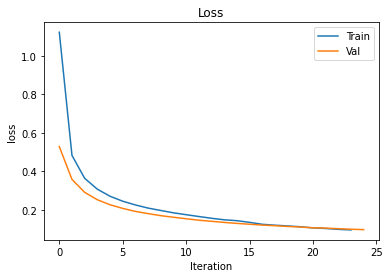

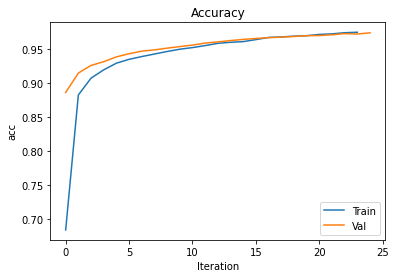

In [34]:
import torch
import torchvision

train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size, shuffle=True)

# result = train_model(model, {'train': zip(X_train, y_train), 'val': zip(X_val, y_val)}, criterion, optimizer)
result = train_model(net, {'train': train_loader, 'val': test_loader}, criterion, optimizer)

Реализация из pytorch обошла мою аж на чуть более 10% accuracy! Вывод - лучше пользоваться существующими средствами, написанными профессионалами, чем пилить велосипеды :)